# First Practical Work

## Data Science and Engineering

### DESIGN OF AN IMAGE FILTER FUNCTION, PARALLELIZABLE AND SCALABLE

**Full name:** \<FILL YOUR NAME HERE\>
    
**NIA** :** \<FILL YOUR NIA HERE\>

In [70]:
import numpy as np 

from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cProfile
from multiprocessing.sharedctypes import Value, Array, RawArray
from multiprocessing import Process, Lock
import ctypes

In [71]:
import my_functions_p as my
import importlib

In [72]:
F_IMAGE1="fence.jpg" #<DEFINE HERE WHICH IMAGE YOU WANTS TO LOAD
F_IMAGE2="hand-x-ray.jpg" #<DEFINE HERE WHICH IMAGE YOU WANTS TO LOAD

In [85]:
image1= np.array(Image.open(F_IMAGE1))
image2= np.array(Image.open(F_IMAGE2))

In [74]:
filter1=np.array([
    [0,0,0,0,0],
    [0,0,0,0,0],
    [0,0,1,0,0],
    [0,0,0,0,0],
    [0,0,0,0,0]
])
filter2=np.array([0.5, 0 , -0.5])
filter3=np.array([[0.5],[0],[-0.5]])

filter4=np.array([
    [1,0,-1],
    [2,0,-2],
    [1,0,-1]
])
filter5=np.array([
    [0.00078633,0.00655965,0.01330373,0.00655965,0.00078633],
    [0.00655965,0.05472157,0.11098164,0.05472157,0.00655965],
    [0.01330373,0.11098164,0.22508352,0.11098164,0.01330373],
    [0.00655965,0.05472157,0.11098164,0.05472157,0.00655965],
    [0.00078633,0.00655965,0.01330373,0.00655965,0.00078633]
])

In [75]:
NUMPROCESS=4

In [76]:
# The multiprocessing.Array class is used to share an array of ctypes 
# of a given type among multiple processes.
filtered_image1_VECTOR=1#HERE YOU HAVE TO DEFINE THE MULTIPROCESSING VECTOR FOR IMAGE1
filtered_image2_VECTOR=2#HERE YOU HAVE TO DEFINE THE MULTIPROCESSING VECTOR FOR IMAGE2

# AFTER THIS CELL YOU HAVE TO WRITE YOUR CODE

After this cell you have to use the preloaded image defined in the F_IMAGE variable, select two of the 5 filter predefined, and using the NUMPROCESS processors, apply the filters to the image and check results.

* The first filter is impulse response filter (the image output must be equals to the original one).
* The second filter is an edge filter, first order in x axis,  
* The third filter is an edge filter, first order in y axis,
* the fourth filter is an edge filter, second order, bi-directional
* the fifth filter is a blur gausian filter.

In [80]:
#YOUR CODE MUST BE START HERE
# IMG 1
# Calculate the number of elements (bytes in this case) in our image
data_buffer_size=image1.shape[0]*image1.shape[1]*image1.shape[2]
# Create an instance of Shared Array object
shared_space= Array(ctypes.c_byte,data_buffer_size)

# Same for IMG 2
data_buffer_size2 = image2.shape[0]*image2.shape[1]*image2.shape[2]
shared_space2= Array(ctypes.c_byte,data_buffer_size2)

In [81]:
importlib.reload(my)

SyntaxError: invalid syntax (my_functions_p.py, line 42)

In [38]:
# IMG 1
# Create NumPy variable
shared_data=my.tonumpyarray(shared_space)
# Reshape variable to see a 3 dimensional vector (tensor)
result_matrix1=shared_data.reshape(image1.shape)

# IMG 2
shared_data2=my.tonumpyarray(shared_space2)
result_matrix2=shared_data2.reshape(image2.shape)

In [17]:
my.image_filter(image1, filter4, NUMPROCESS, shared_space)

In [39]:
my.image_filter(image2, filter4, NUMPROCESS, shared_space2)

In [40]:
#YOUR CODE MUST END HERE

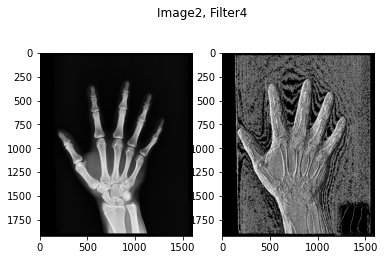

In [50]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Image2, Filter4')
ax1.imshow(image2)
ax2.imshow(result_matrix2)

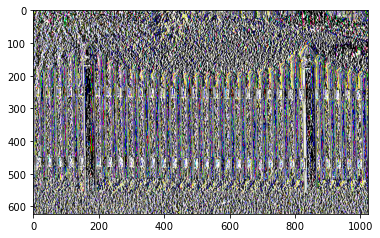

In [19]:
plt.figure()
plt.imshow(result_matrix1)

# Visualization
In this last cells we take the filtered images stored in the multiprocessing.Vector variables filtered_image1_VECTOR and filtered_image2_VECTOR, converts to numpy array, with the same shape of the orginal images, and show the results.

In [ ]:
filtered_image1=tonumpyarray(filtered_image1_VECTOR).reshape(image1.shape)
filtered_image2=tonumpyarray(filtered_image2_VECTOR).reshape(image2.shape)

In [ ]:
plt.figure()
plt.imshow(filtered_image1)

In [ ]:
plt.figure()
plt.imshow(filtered_image2)